In [23]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [24]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [25]:
NUM_CLASSES = 5

# 学習データ読み込み

In [26]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [27]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [30]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 42)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                860       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 55        
Total params: 1,125
Trainable params: 1,125
Non-trainable params: 0
_________________________________________________________________


In [31]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [32]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [33]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
3/3 [==============================] - 1s 88ms/step - loss: 1.5381 - accuracy: 0.2559 - val_loss: 1.3612 - val_accuracy: 0.5965

Epoch 00001: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 2/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.4622 - accuracy: 0.3588 - val_loss: 1.3183 - val_accuracy: 0.5965

Epoch 00002: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 3/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.4416 - accuracy: 0.3735 - val_loss: 1.2738 - val_accuracy: 0.5965

Epoch 00003: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 4/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.4193 - accuracy: 0.3882 - val_loss: 1.2317 - val_accuracy: 0.5965

Epoch 00004: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 5/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.3767 - accuracy: 0.4265 - val_loss: 1

3/3 [==============================] - 0s 10ms/step - loss: 0.6732 - accuracy: 0.7676 - val_loss: 0.4690 - val_accuracy: 0.9825

Epoch 00038: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 39/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.6834 - accuracy: 0.7853 - val_loss: 0.4546 - val_accuracy: 0.9825

Epoch 00039: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 40/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.6898 - accuracy: 0.7588 - val_loss: 0.4409 - val_accuracy: 0.9825

Epoch 00040: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 41/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.6716 - accuracy: 0.8147 - val_loss: 0.4276 - val_accuracy: 0.9825

Epoch 00041: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 42/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.6555 - accuracy: 0.7853 - val_loss: 0.4146 - v

3/3 [==============================] - 0s 16ms/step - loss: 0.3485 - accuracy: 0.9059 - val_loss: 0.1304 - val_accuracy: 1.0000

Epoch 00075: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 76/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.3860 - accuracy: 0.8676 - val_loss: 0.1255 - val_accuracy: 1.0000

Epoch 00076: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 77/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.3438 - accuracy: 0.9118 - val_loss: 0.1208 - val_accuracy: 1.0000

Epoch 00077: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 78/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3614 - accuracy: 0.8824 - val_loss: 0.1163 - val_accuracy: 1.0000

Epoch 00078: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 79/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.3589 - accuracy: 0.8882 - val_loss: 0.1121 - v

Epoch 112/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.2449 - accuracy: 0.9353 - val_loss: 0.0406 - val_accuracy: 1.0000

Epoch 00112: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 113/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.2434 - accuracy: 0.9147 - val_loss: 0.0393 - val_accuracy: 1.0000

Epoch 00113: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 114/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.2149 - accuracy: 0.9265 - val_loss: 0.0380 - val_accuracy: 1.0000

Epoch 00114: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 115/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.2014 - accuracy: 0.9471 - val_loss: 0.0366 - val_accuracy: 1.0000

Epoch 00115: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 116/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.2224 - accuracy: 0.9235 - val


Epoch 00148: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 149/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.1961 - accuracy: 0.9353 - val_loss: 0.0188 - val_accuracy: 1.0000

Epoch 00149: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 150/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.1809 - accuracy: 0.9441 - val_loss: 0.0184 - val_accuracy: 1.0000

Epoch 00150: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 151/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.1836 - accuracy: 0.9412 - val_loss: 0.0180 - val_accuracy: 1.0000

Epoch 00151: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 152/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.1854 - accuracy: 0.9324 - val_loss: 0.0176 - val_accuracy: 1.0000

Epoch 00152: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 153/1000
3/3 [===

3/3 [==============================] - 0s 13ms/step - loss: 0.1320 - accuracy: 0.9529 - val_loss: 0.0100 - val_accuracy: 1.0000

Epoch 00185: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 186/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.1106 - accuracy: 0.9735 - val_loss: 0.0099 - val_accuracy: 1.0000

Epoch 00186: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 187/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.1587 - accuracy: 0.9471 - val_loss: 0.0098 - val_accuracy: 1.0000

Epoch 00187: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 188/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.1145 - accuracy: 0.9735 - val_loss: 0.0097 - val_accuracy: 1.0000

Epoch 00188: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 189/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.1257 - accuracy: 0.9706 - val_loss: 0.0094

Epoch 222/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.1082 - accuracy: 0.9588 - val_loss: 0.0058 - val_accuracy: 1.0000

Epoch 00222: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 223/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.1273 - accuracy: 0.9618 - val_loss: 0.0059 - val_accuracy: 1.0000

Epoch 00223: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 224/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.1023 - accuracy: 0.9647 - val_loss: 0.0059 - val_accuracy: 1.0000

Epoch 00224: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 225/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.1486 - accuracy: 0.9324 - val_loss: 0.0059 - val_accuracy: 1.0000

Epoch 00225: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 226/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0895 - accuracy: 0.9676 - v

3/3 [==============================] - 0s 24ms/step - loss: 0.0871 - accuracy: 0.9765 - val_loss: 0.0047 - val_accuracy: 1.0000

Epoch 00258: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 259/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.1012 - accuracy: 0.9765 - val_loss: 0.0046 - val_accuracy: 1.0000

Epoch 00259: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 260/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.1192 - accuracy: 0.9647 - val_loss: 0.0046 - val_accuracy: 1.0000

Epoch 00260: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 261/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0824 - accuracy: 0.9853 - val_loss: 0.0045 - val_accuracy: 1.0000

Epoch 00261: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 262/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.1443 - accuracy: 0.9559 - val_loss: 0.0045

Epoch 295/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.1009 - accuracy: 0.9706 - val_loss: 0.0029 - val_accuracy: 1.0000

Epoch 00295: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 296/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.1028 - accuracy: 0.9676 - val_loss: 0.0029 - val_accuracy: 1.0000

Epoch 00296: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 297/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0989 - accuracy: 0.9706 - val_loss: 0.0028 - val_accuracy: 1.0000

Epoch 00297: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 298/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0879 - accuracy: 0.9765 - val_loss: 0.0028 - val_accuracy: 1.0000

Epoch 00298: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 299/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.1281 - accuracy: 0.9529 - v


Epoch 00331: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 332/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0814 - accuracy: 0.9706 - val_loss: 0.0022 - val_accuracy: 1.0000

Epoch 00332: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 333/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0763 - accuracy: 0.9765 - val_loss: 0.0022 - val_accuracy: 1.0000

Epoch 00333: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 334/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0789 - accuracy: 0.9735 - val_loss: 0.0022 - val_accuracy: 1.0000

Epoch 00334: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 335/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0765 - accuracy: 0.9706 - val_loss: 0.0022 - val_accuracy: 1.0000

Epoch 00335: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 336/1000
3/3 [===

3/3 [==============================] - 0s 21ms/step - loss: 0.0759 - accuracy: 0.9706 - val_loss: 0.0018 - val_accuracy: 1.0000

Epoch 00368: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 369/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0847 - accuracy: 0.9765 - val_loss: 0.0018 - val_accuracy: 1.0000

Epoch 00369: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 370/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0707 - accuracy: 0.9735 - val_loss: 0.0017 - val_accuracy: 1.0000

Epoch 00370: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 371/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0780 - accuracy: 0.9765 - val_loss: 0.0017 - val_accuracy: 1.0000

Epoch 00371: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 372/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0749 - accuracy: 0.9735 - val_loss: 0.0017

Epoch 405/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0845 - accuracy: 0.9706 - val_loss: 0.0016 - val_accuracy: 1.0000

Epoch 00405: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 406/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0798 - accuracy: 0.9765 - val_loss: 0.0016 - val_accuracy: 1.0000

Epoch 00406: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 407/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0779 - accuracy: 0.9676 - val_loss: 0.0016 - val_accuracy: 1.0000

Epoch 00407: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 408/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0687 - accuracy: 0.9824 - val_loss: 0.0016 - val_accuracy: 1.0000

Epoch 00408: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 409/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0885 - accuracy: 0.9706 - v


Epoch 00441: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 442/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0692 - accuracy: 0.9735 - val_loss: 0.0012 - val_accuracy: 1.0000

Epoch 00442: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 443/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0876 - accuracy: 0.9647 - val_loss: 0.0012 - val_accuracy: 1.0000

Epoch 00443: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 444/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0815 - accuracy: 0.9735 - val_loss: 0.0013 - val_accuracy: 1.0000

Epoch 00444: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 445/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0733 - accuracy: 0.9824 - val_loss: 0.0013 - val_accuracy: 1.0000

Epoch 00445: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 446/1000
3/3 [===

3/3 [==============================] - 0s 14ms/step - loss: 0.0670 - accuracy: 0.9794 - val_loss: 9.8112e-04 - val_accuracy: 1.0000

Epoch 00478: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 479/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0901 - accuracy: 0.9735 - val_loss: 0.0010 - val_accuracy: 1.0000

Epoch 00479: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 480/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0695 - accuracy: 0.9794 - val_loss: 0.0011 - val_accuracy: 1.0000

Epoch 00480: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 481/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0631 - accuracy: 0.9824 - val_loss: 0.0011 - val_accuracy: 1.0000

Epoch 00481: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 482/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0607 - accuracy: 0.9824 - val_loss: 0.

In [34]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 26ms/step - loss: 9.3404e-04 - accuracy: 1.0000


In [35]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [36]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[1.4585389e-06 1.8494304e-05 2.1738788e-07 7.6277228e-04 9.9921703e-01]
4


# 混同行列

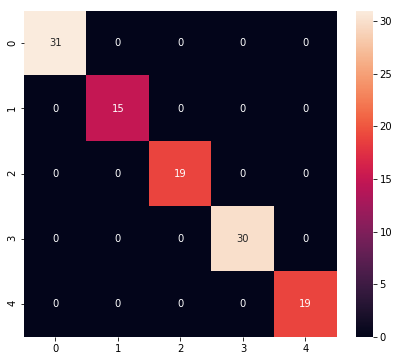

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        19

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [38]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [39]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpoova2hw9/assets


INFO:tensorflow:Assets written to: /tmp/tmpoova2hw9/assets


6448

# 推論テスト

In [40]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [41]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [42]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [43]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 136 µs, sys: 9 µs, total: 145 µs
Wall time: 165 µs


In [44]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.4585376e-06 1.8494269e-05 2.1738747e-07 7.6277048e-04 9.9921703e-01]
4
